**John Wilson Lorin**

**BSCS-3A**

#Import Libraries


In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime


#1. Data Cleaning and Preparation

In [19]:
df = pd.read_csv('googleplaystore.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

def convert_size(x):
    if 'M' in x:
        return float(x[:-1]) * 1000000
    elif 'k' in x:
        return float(x[:-1]) * 1000
    else:
        return 0
df['Size'] = df['Size'].apply(convert_size)
df['Installs'] = df['Installs'].apply(lambda x: int(x[:-1].replace(',', '')))
df['Price'] = df['Price'].apply(lambda x: float(x[1:]) if '$' in x else 0)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Exploratory Data Analysis (**EDA**)

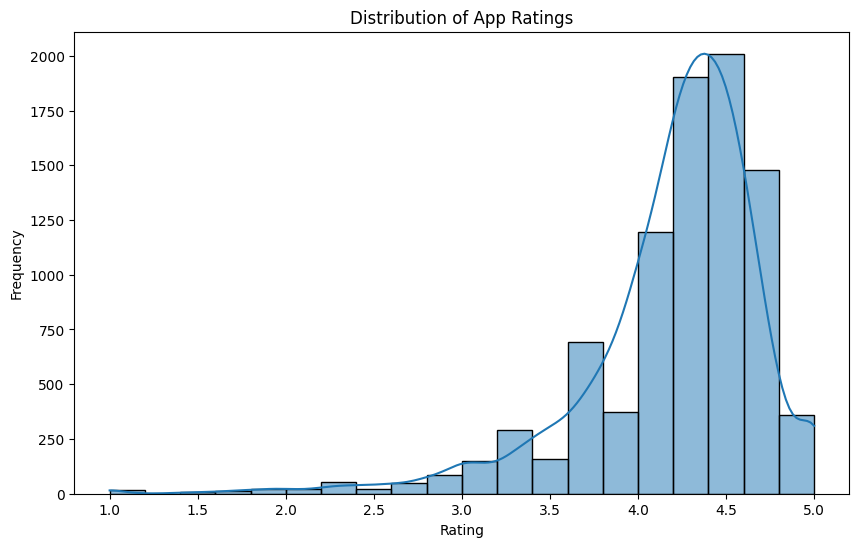

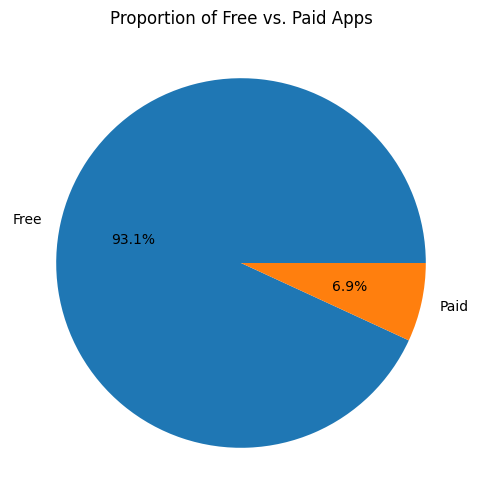

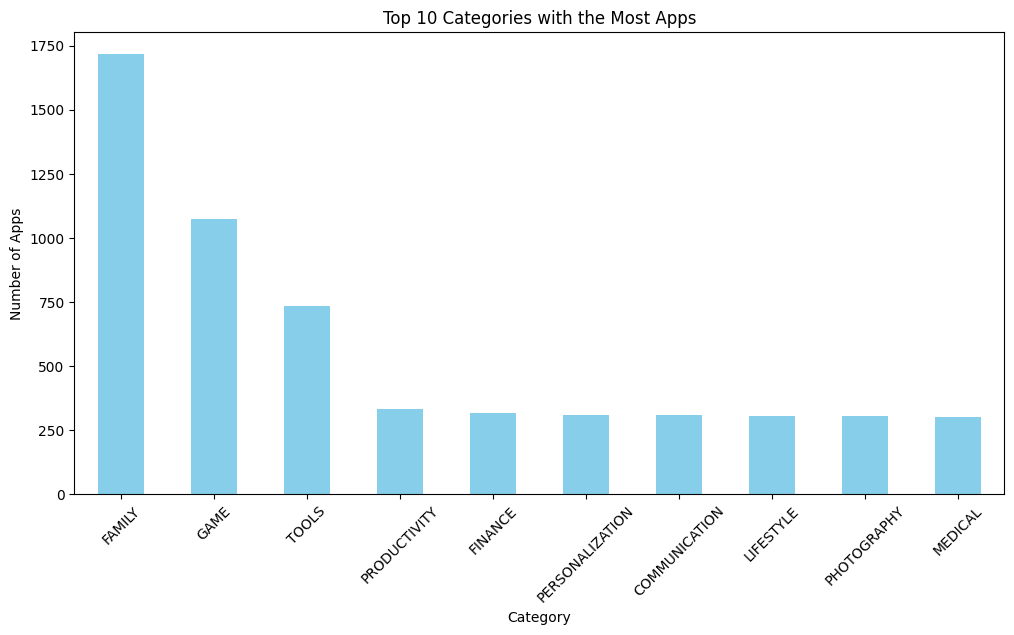

In [20]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 6))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Free vs. Paid Apps')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12, 6))
top_categories = df['Category'].value_counts().head(10)
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories with the Most Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

# 3. Category Analysis

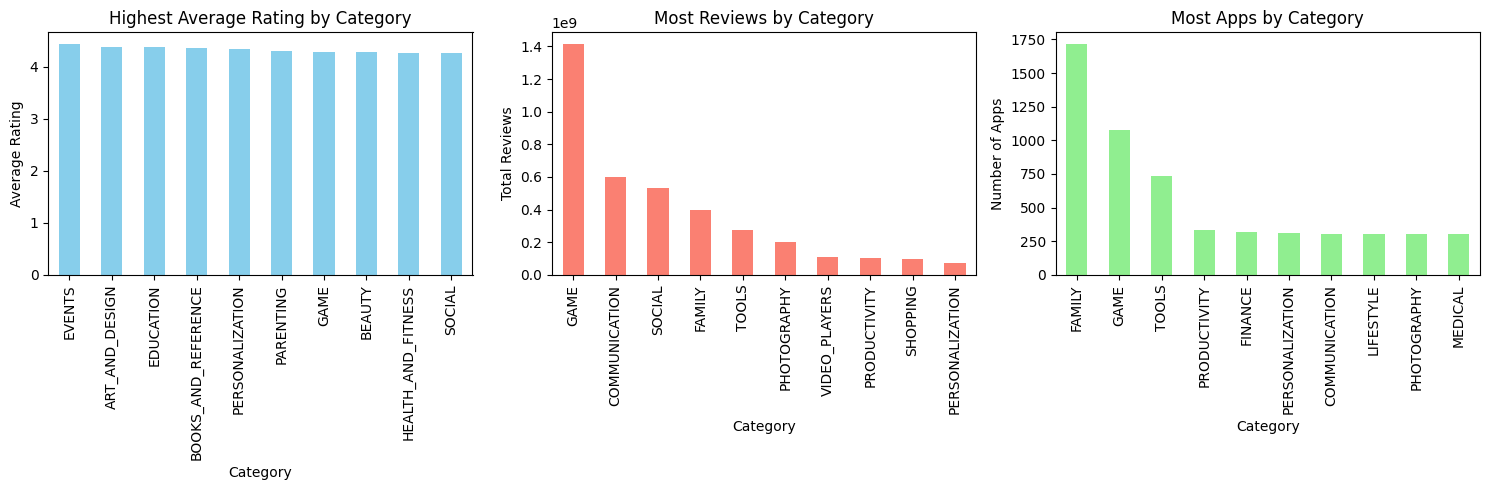

In [21]:


avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

most_reviews_by_category = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

most_apps_by_category = df['Category'].value_counts().head(10)

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
avg_rating_by_category.plot(kind='bar', color='skyblue')
plt.title('Highest Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')

plt.subplot(1, 3, 2)
most_reviews_by_category.plot(kind='bar', color='salmon')
plt.title('Most Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Total Reviews')

plt.subplot(1, 3, 3)
most_apps_by_category.plot(kind='bar', color='lightgreen')
plt.title('Most Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')

plt.tight_layout()
plt.show()

# 4. Rating Prediction Model

In [22]:
features = ['Reviews', 'Size','Installs', 'Price']
X = df[features]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.27346864152139044


# 5. Trend Analysis

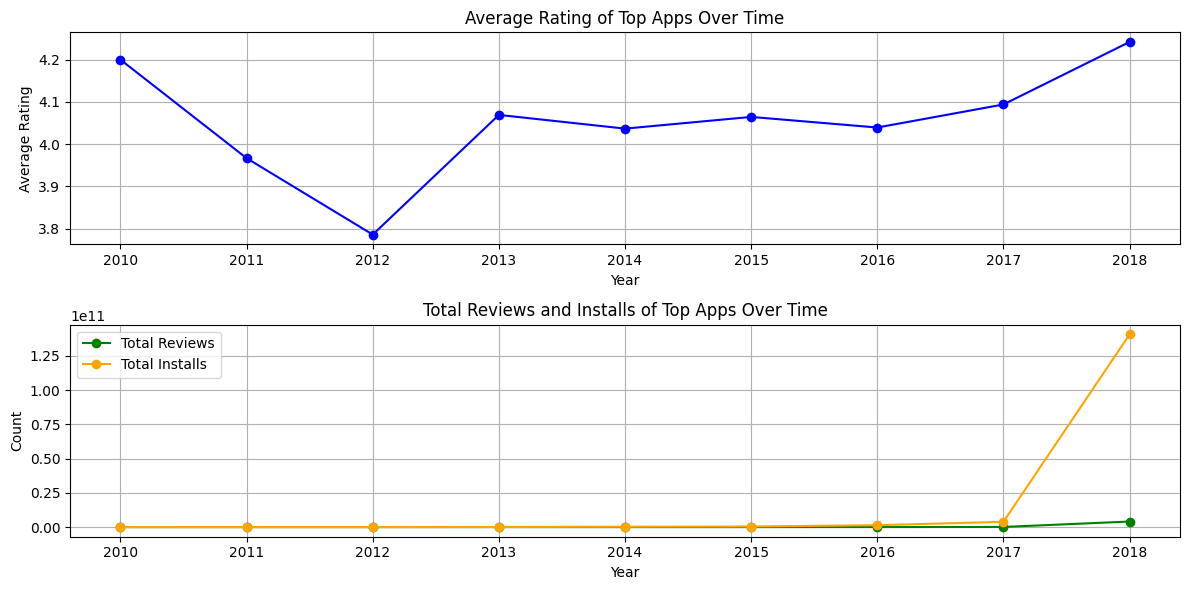

In [23]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Year'] = df['Last Updated'].dt.year
grouped_by_year = df.groupby('Year')

avg_rating_by_year = grouped_by_year['Rating'].mean()
total_reviews_by_year = grouped_by_year['Reviews'].sum()
total_installs_by_year = grouped_by_year['Installs'].sum()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, marker='o', linestyle='-', color='blue')
plt.title('Average Rating of Top Apps Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(total_reviews_by_year.index, total_reviews_by_year.values, marker='o', linestyle='-', color='green', label='Total Reviews')
plt.plot(total_installs_by_year.index, total_installs_by_year.values, marker='o', linestyle='-', color='orange', label='Total Installs')
plt.title('Total Reviews and Installs of Top Apps Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 6. Impact of Reviews on Ratings

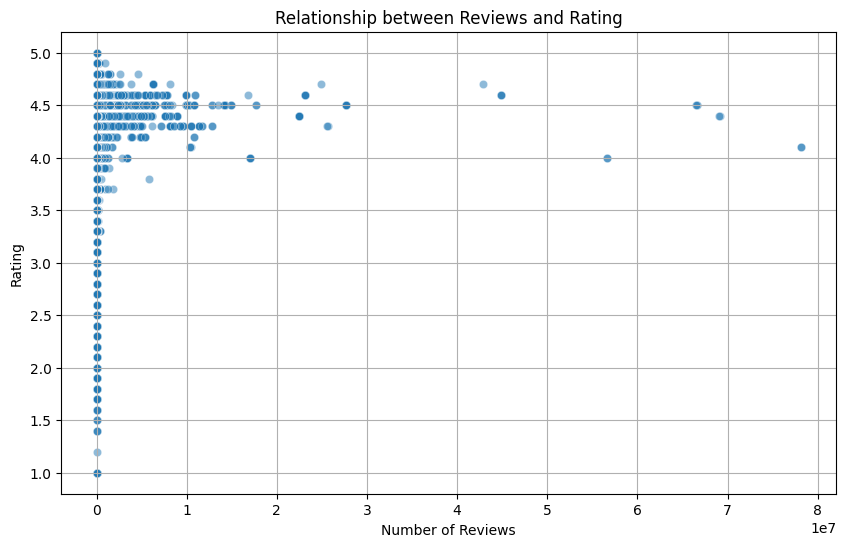

Correlation Coefficient between Reviews and Rating: 0.06872388127364139


In [24]:
df.dropna(subset=['Rating', 'Reviews'], inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, alpha=0.5)
plt.title('Relationship between Reviews and Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

correlation_coefficient = df['Reviews'].corr(df['Rating'])
print("Correlation Coefficient between Reviews and Rating:", correlation_coefficient)
